LOAD TỆP NHÃN DỮ LIỆU TỪ FILE TXT

In [ ]:
!wget 'https://raw.githubusercontent.com/TungCan273/QuickDraw/master/mini_classes.txt'x

--2023-04-18 03:26:59--  https://raw.githubusercontent.com/TungCan273/QuickDraw/master/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     433  --.-KB/s    in 0s      

2023-04-18 03:26:59 (17.5 MB/s) - ‘mini_classes.txt’ saved [433/433]



ĐỌC TỆP

In [ ]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [ ]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

TẠO 1 TỆP DATA ĐỂ LƯU DỮ LIỆU TẢI VỀ

In [ ]:
!mkdir data

TẢI DỮ LIỆU

In [ ]:
import urllib.request

base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
for c in classes:        
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

THÊM CÁC THƯ VIỆN CẦN SỬ DỤNG

In [ ]:
import os
import glob
import pickle
import numpy as np
from tensorflow.python.keras import layers
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical, np_utils

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow import keras 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
print(len(os.listdir('data')))

50


In [ ]:
print(os.listdir('data'))

['drums.npy', 'car.npy', 'square.npy', 'grapes.npy', 'chair.npy', 'star.npy', 'sun.npy', 'eye.npy', 'camera.npy', 'wristwatch.npy', 'shovel.npy', 'radio.npy', 'snake.npy', 'tennis_racquet.npy', 'smiley_face.npy', 'laptop.npy', 'cloud.npy', 'eyeglasses.npy', 'bread.npy', 'lollipop.npy', 'tree.npy', 'headphones.npy', 'spider.npy', 'syringe.npy', 'baseball_bat.npy', 'mountain.npy', 'dumbbell.npy', 'airplane.npy', 'cell_phone.npy', 'apple.npy', 'traffic_light.npy', 'moon.npy', 'mushroom.npy', 'anvil.npy', 'ladder.npy', 'table.npy', 'bed.npy', 'diving_board.npy', 'broom.npy', 'shorts.npy', 'pants.npy', 'book.npy', 'sword.npy', 'power_outlet.npy', 'clock.npy', 'hot_dog.npy', 'stop_sign.npy', 'wheel.npy', 'flower.npy', 'face.npy']


HÀM LOAD_DATA ĐƯỢC SỬ DỤNG ĐỂ LÀM VIỆC VỚI DỮ LIỆU 

In [ ]:
import tensorflow as tf
import numpy as np
import os
import glob

def load_data(root, vfold_ratio=0.2, max_items_per_class=5000):
    files = glob.glob(os.path.join(root, '*.npy'))
    
    data = np.empty([0, 784])
    labels = np.empty([0], dtype=int)
    class_names = []

    for idx, file in enumerate(files):
        class_name,_ = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

        class_data = np.load(file)[0:max_items_per_class, : ]
        class_labels = np.full(class_data.shape[0], idx)

        data = np.concatenate((data, class_data), axis=0)
        labels = np.append(labels, class_labels)

    class_data = None
    class_labels = None

    #random dataset 
    x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=42, test_size=0.2)
    x_test = x_test.astype('float32')
    y_test = y_test.astype('float32')
    
    print("x_train\n",x_train, x_train.shape)
    print("y_train\n",y_train, y_train.shape)
    print("x_test\n",x_test, x_test.shape)
    print("y_test\n",y_test, y_test.shape)

    return x_train, y_train, x_test, y_test, class_names

In [ ]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = 100
image_size = 28

x_train
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (200000, 784)
y_train
 [15 13 32 ... 26 29 24] (200000,)
x_test
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (50000, 784)
y_test
 [ 7. 12.  0. ... 34. 27. 41.] (50000,)


RANDOM 1 DỮ LIỆU BẤT KÌ,
IN RA CLASS_NAME CỦA NÓ VÀ BỨC ẢNH ĐẠI DIỆN CHO NHÃN ĐÓ

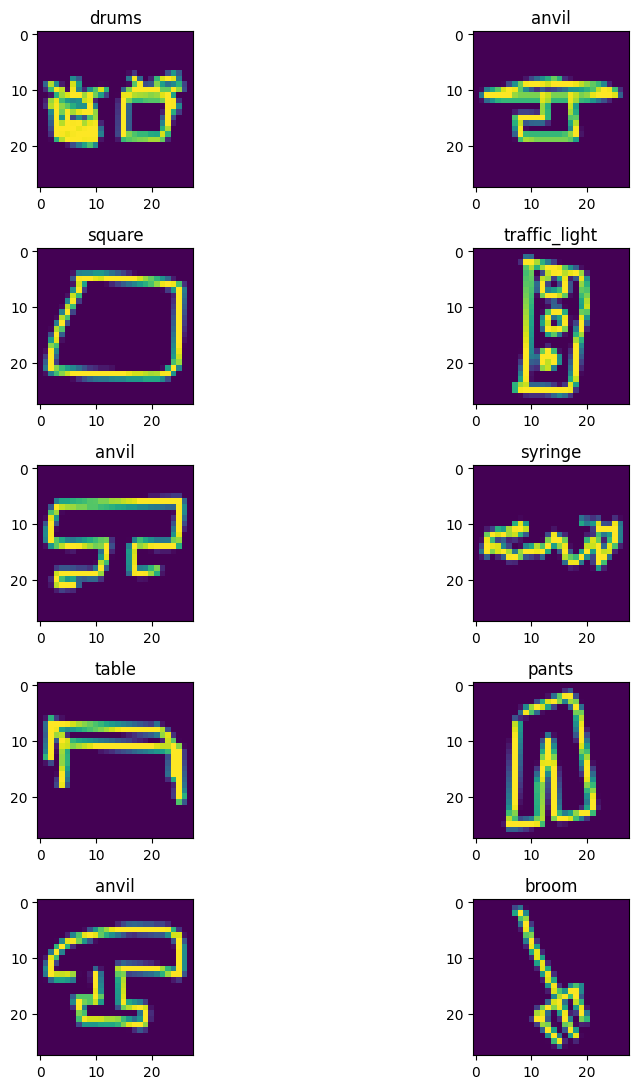

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  

bg,cg = plt.subplots(5,2)
bg.set_size_inches(11,11)
for i in range(5):
  for j in range(2): 
    id = randint(0,len(x_train))
    cg[i,j].imshow(x_train[id].reshape(28,28))
    cg[i,j].set_title(class_names[int(y_train[id].item())])
plt.tight_layout()

RESHAPE 

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(num_classes)

100


XÂY DỰNG MÔ HÌNH HOÀN CHỈNH

In [ ]:
# Define model
model = keras.Sequential()
model.add(Conv2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(100, activation='softmax'))

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

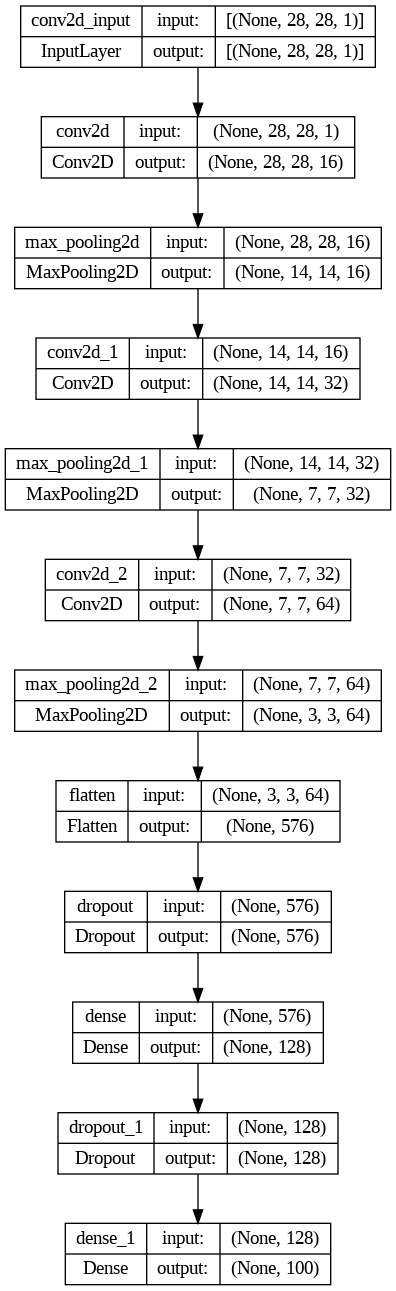

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
History = model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size = 256, verbose=1, epochs=5)


Epoch 1/5
782/782 [==============================] - 177s 225ms/step - loss: 2.3909 - top_k_categorical_accuracy: 0.6834 - val_loss: 1.2914 - val_top_k_categorical_accuracy: 0.9021
Epoch 2/5
782/782 [==============================] - 185s 236ms/step - loss: 1.6158 - top_k_categorical_accuracy: 0.8571 - val_loss: 1.0815 - val_top_k_categorical_accuracy: 0.9194
Epoch 3/5
782/782 [==============================] - 199s 254ms/step - loss: 1.4626 - top_k_categorical_accuracy: 0.8774 - val_loss: 0.9785 - val_top_k_categorical_accuracy: 0.9306
Epoch 4/5
782/782 [==============================] - 173s 221ms/step - loss: 1.3787 - top_k_categorical_accuracy: 0.8859 - val_loss: 0.8929 - val_top_k_categorical_accuracy: 0.9339
Epoch 5/5
782/782 [==============================] - 188s 241ms/step - loss: 1.3241 - top_k_categorical_accuracy: 0.8921 - val_loss: 0.8690 - val_top_k_categorical_accuracy: 0.9364


In [43]:
import matplotlib.pyplot as plt
test_loss, score = model.evaluate(x_test, y_test)

print('loss: ',test_loss)
print('Test accuarcy: {:0.2f}%'.format(score* 100))


1563/1563 [==============================] - 19s 12ms/step - loss: 0.8690 - top_k_categorical_accuracy: 0.9364
loss:  0.8690304756164551
Test accuarcy: 93.64%


In [44]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['top_k_categorical_accuracy']
    val_accuracy = training_history.history['val_top_k_categorical_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.grid(linestyle="--", linewidth=1, color='.25', zorder=-10)
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])

    plt.subplot(1, 2, 2)
    plt.grid(linestyle="--", linewidth=1, color='.25', zorder=-10)
    plt.plot(History.history['top_k_categorical_accuracy'])
    plt.plot(History.history['val_top_k_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])

    plt.show()

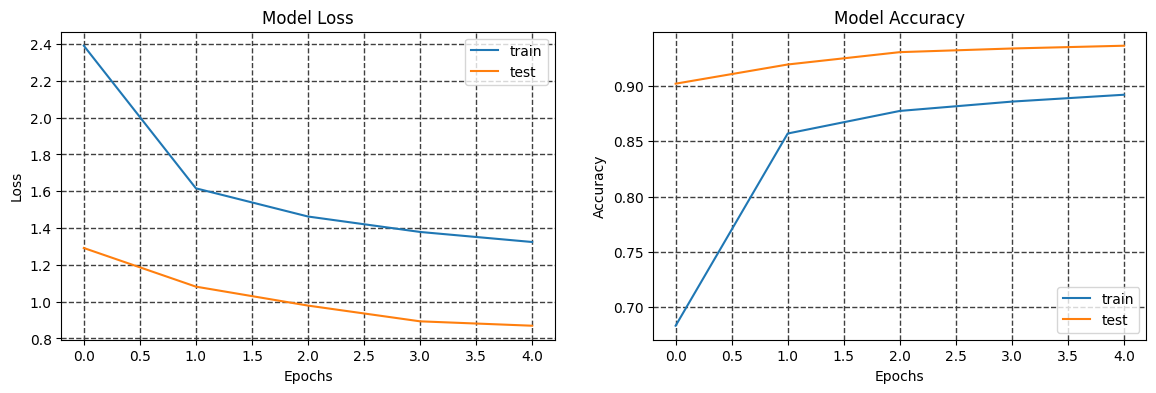

In [45]:
render_training_history(History)

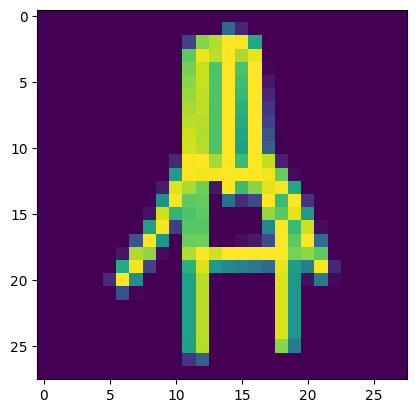

In [46]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 

In [47]:
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
print([class_names[x] for x in ind])

1/1 [==============================] - 0s 90ms/step
['chair', 'mountain', 'ladder', 'sword', 'broom']


In [48]:
model.save('model.h5')
model = keras.models.load_model('/content/model.h5')

In [ ]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [ ]:
!pip install tensorflowjs 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 36.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

In [ ]:
!wget 'https://github.com/TungCan273/QuickDraw/blob/master/model/QuickDraw.h5'

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [63]:
#pylint: disable=E1101

import cv2
import numpy as np
from keras.models import load_model
import os
import cv2
import numpy as np
import torch
from PIL import Image

CLASSES = ['drums', 'alarmclock', 'apple', 'backpack', 'barn', 
               'bed', 'bowtie', 'candle', 'door', 'envelope', 
               'fish', 'guitar', 'icecream', 'mountain', 'star', 
               'tent', 'toothbrush', 'wristwatch']

image = np.zeros((480, 640, 3), dtype=np.float32)

def main():
  Del_contour()
  Load_img()

def Load_img():
    model = load_model("model.h5")
    #Convert_8bit()
    image = cv2.imread("/content/painted.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28,28))
    image = np.array(image, dtype=np.float32)[None, :, :]
    logits = model.predict(image)[0]
    print(class_names[np.argmax(logits)])
    image = np.zeros((480,640,3), dtype=np.uint8)

def Convert_8bit():
    """
    Convert_8bit: String, String -> void.
    Converts the input image file into 8bit depth.
    im = Image.open(src)
    if not im.mode == "P":
        im2 = im.convert('RGB').convert('P', palette=Image.ADAPTIVE)
        im2.save(dest)
        """

    img_path = "/content/painted.png"
    img = Image.open(img_path)
    # Convert the image to 8-bit mode
    quantized = img.quantize(colors=256)
    # Save the quantized image
    quantized.save("/content/painted.png")

def Del_contour():
    # Read the image and convert it to grayscale
    image = cv2.imread("/content/painted.png")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold to convert the image to black and white
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours of the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the image to remove the excess white space
    image = image[y:y+h, x:x+w]

    # Save the image and resize this from (480,640) to (28,28)
    image = cv2.resize(image,(28,28))
    cv2.imwrite("/content/painted.png", image)

if __name__ == '__main__':
    main()
    # Convert_8bit()
    # Del_contour()
    # Load_img()


1/1 [==============================] - 0s 216ms/step
grapes


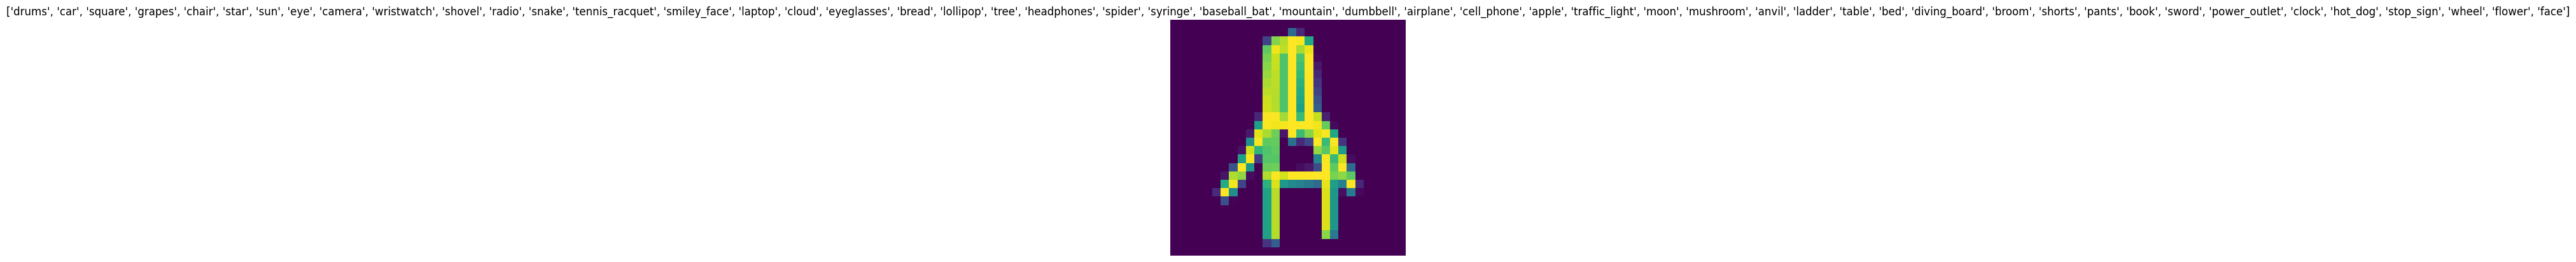

In [60]:
plt.imshow(img.squeeze())
plt.title(class_names)
plt.axis('off')
plt.show()